In [2]:
import numpy as np
import pandas as pd

import os
import glob

import cv2
import keras
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# patht to the repository on the local machine
repository_dir = '/mnt/sdb/Dropbox/Jobs/Gießen/'
nets_dir = repository_dir + '/kernelphysiology/python/nets/'

In [120]:
def plot_top_bottom(all_results, all_labels, metric='val_acc'):
    metric_all = np.zeros((len(all_results), 1))
    average_results = np.zeros((all_results[0].get(metric).get_values().shape[0]))
    for i, current_result in enumerate(all_results):
        metric_all[i] = all_results[i].get(metric).get_values()[-1]
        average_results += all_results[i].get(metric).get_values()
    max_elemnt = metric_all.argmax()
    min_elemnt = metric_all.argmin()
    average_results /= len(all_results)
    plt.plot(all_results[max_elemnt].get(metric).get_values(), label=all_labels[max_elemnt])
    plt.plot(all_results[min_elemnt].get(metric).get_values(), label=all_labels[min_elemnt])
    plt.plot(average_results, label='average')
    plt.legend(loc='right', bbox_to_anchor=(2.5, 0.5), ncol=1)
    print(metric_all.max(), metric_all.min(), metric_all.mean())

In [126]:
experiment_dir = nets_dir + '/cifar/cifar10/resnet20/icml/batch_size_32/lr_schedule_resnet/'

all_results = []
all_paths = []
all_labels = []
for folder in sorted(glob.glob(experiment_dir + '*')):
    results_file = folder + '/model_area_None/log.csv'
    if not os.path.isfile(results_file):
        print(results_file)
    else:
        all_results.append(pd.read_csv(results_file, delimiter=';'))
        all_paths.append(results_file)
        all_labels.append(folder.replace(experiment_dir, ''))

0.9028 0.4271 0.8214208333333334
lr_schedule_resnet


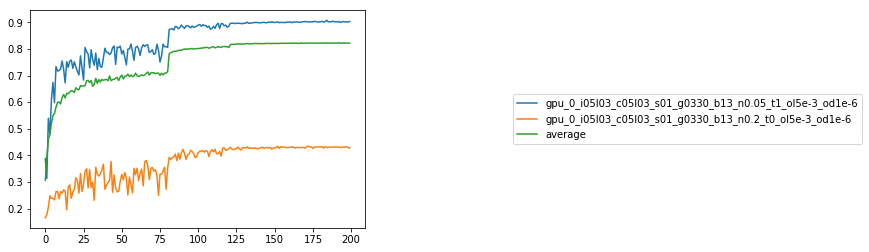

In [127]:
plot_top_bottom(all_results, all_labels, metric='val_acc')
print('lr_schedule_resnet')

0.9002 0.4526 0.8187541666666668
lr_schedule_arash


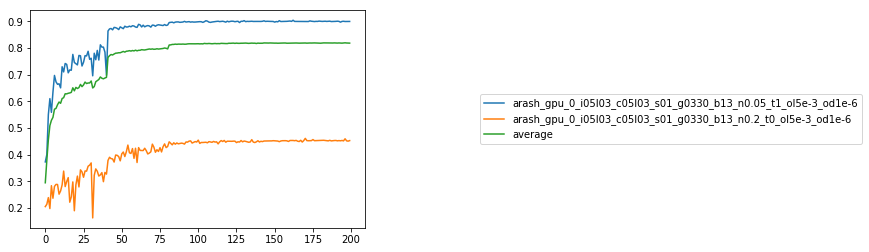

In [125]:
plot_top_bottom(all_results, all_labels, metric='val_acc')
print('lr_schedule_arash')

0.9059 0.8376 0.8808812500000001
g1g2none


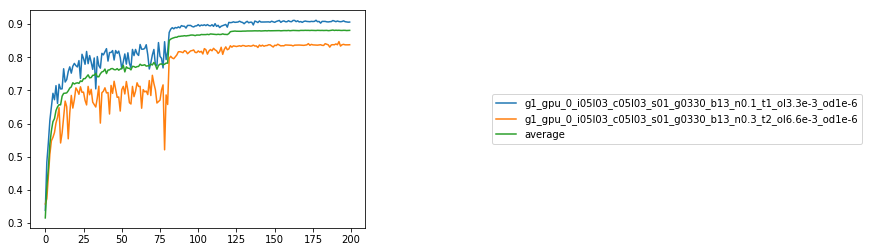

In [121]:
plot_top_bottom(all_results, all_labels, metric='val_acc')
print('g1g2none')

0.9101 0.8425 0.8814625
g1


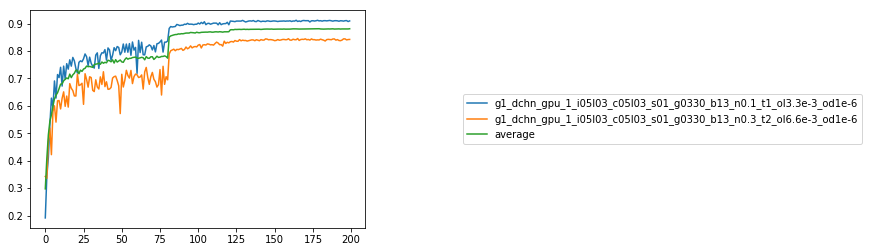

In [123]:
plot_top_bottom(all_results, all_labels, metric='val_acc')
print('g1')

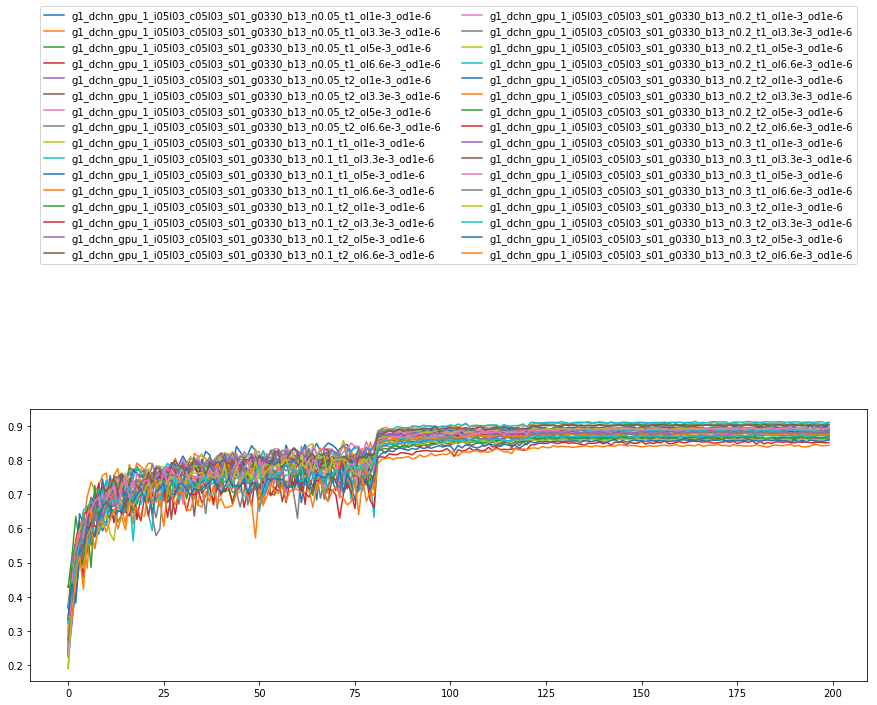

In [8]:
plt.figure(figsize=(15,5))
for i, current_result in enumerate(all_results):
    plt.plot(all_results[i].val_acc, label=all_labels[i])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 2.5), ncol=2)

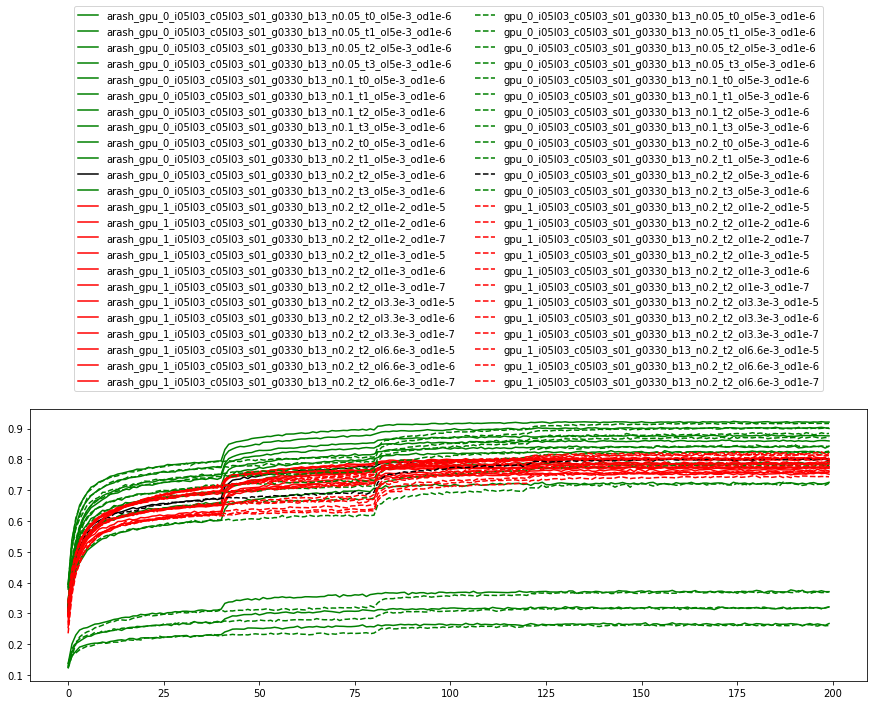

In [104]:
plt.figure(figsize=(15,5))
colours = ['green'] * 12
colours.extend(['red'] * 12)
colours.extend(['green'] * 12)
colours.extend(['red'] * 12)
colours[10] = 'black'
colours[34] = 'black'
line_styles = ['-'] * 12
line_styles.extend(['-'] * 12)
line_styles.extend(['--'] * 12)
line_styles.extend(['--'] * 12)
for i, current_result in enumerate(all_results):
    plt.plot(all_results[i].acc, label=all_labels[i], color=colours[i], linestyle=line_styles[i])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 2.5), ncol=2)

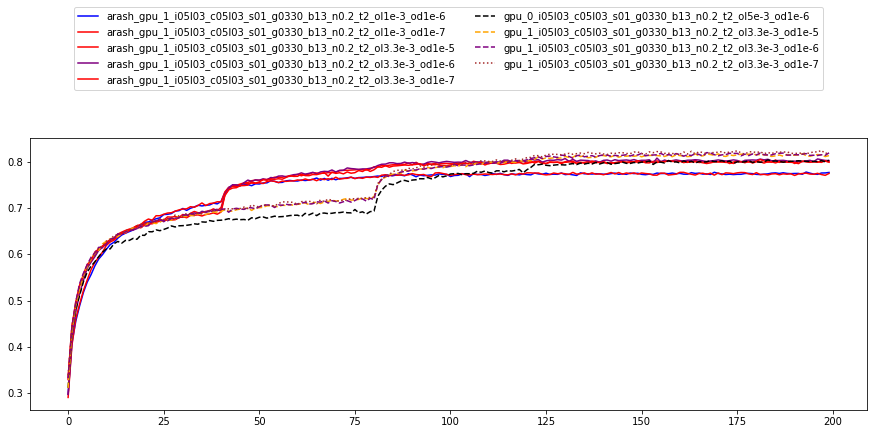

In [138]:
plt.figure(figsize=(15,5))
which_inds = [*range(16, 21), 34, *range(42, 45)] # 10, *range(12, 24), 
colours = ['green'] * 12
colours.extend(['red'] * 12)
colours.extend(['green'] * 12)
colours.extend(['orange'] * 12)
colours[10] = 'black'
colours[34] = 'black'
colours[13] = 'green'
colours[37] = 'green'
colours[16] = 'blue'
colours[40] = 'blue'
colours[19] = 'purple'
colours[43] = 'purple'
colours[22] = 'brown'
colours[44] = 'brown'
line_styles = ['-'] * 12
line_styles.extend(['-'] * 12)
line_styles.extend(['--'] * 12)
line_styles.extend(['--'] * 12)
line_styles[44] = (':') * 1
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], color=colours[i], linestyle=line_styles[i])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)

Text(0,0.5,'Training Accuracy (%)')

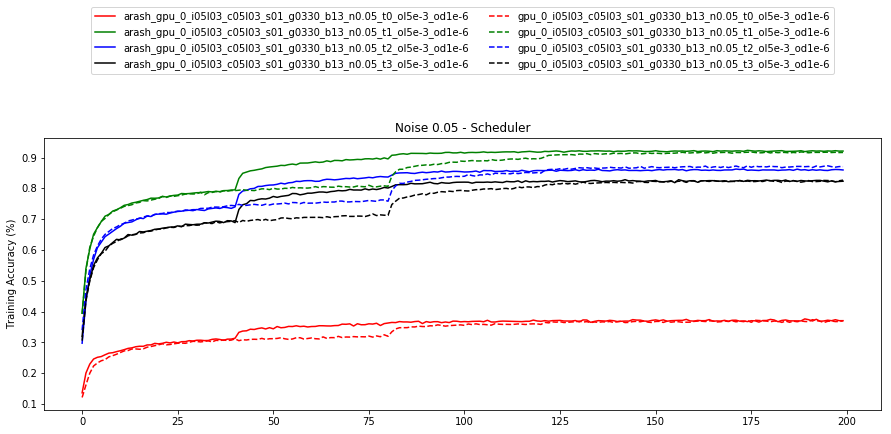

In [76]:
plt.figure(figsize=(15,5))
which_inds = [*range(4), *range(24, 28)]
line_styles = ['-'] * 4
line_styles.extend(['--'] * 4)
colours = ['red', 'green', 'blue', 'black'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise 0.05 - Scheduler')
plt.ylabel('Validation Accuracy (%)')

Text(0,0.5,'Validation Accuracy (%)')

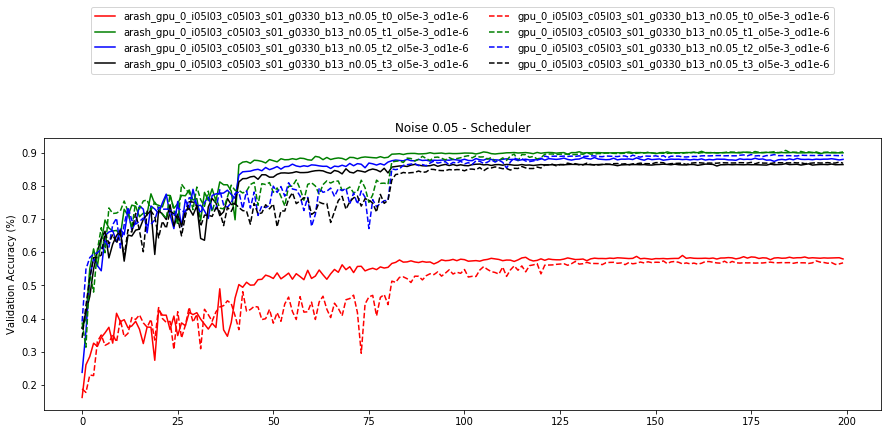

In [75]:
plt.figure(figsize=(15,5))
which_inds = [*range(4), *range(24, 28)]
line_styles = ['-'] * 4
line_styles.extend(['--'] * 4)
colours = ['red', 'green', 'blue', 'black'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise 0.05 - Scheduler')
plt.ylabel('Validation Accuracy (%)')

Text(0,0.5,'Accuracy (%)')

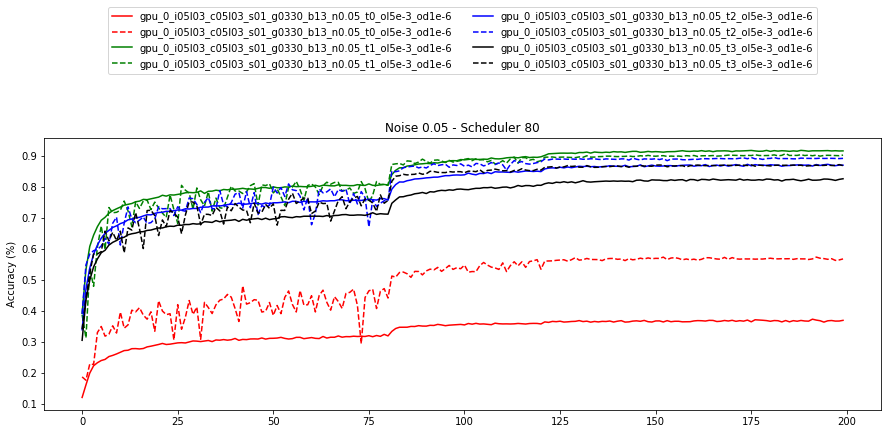

In [78]:
plt.figure(figsize=(15,5))
which_inds = [*range(24, 28)]
colours = ['red', 'green', 'blue', 'black']
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise 0.05 - Scheduler 80')
plt.ylabel('Accuracy (%)')

Text(0,0.5,'Accuracy (%)')

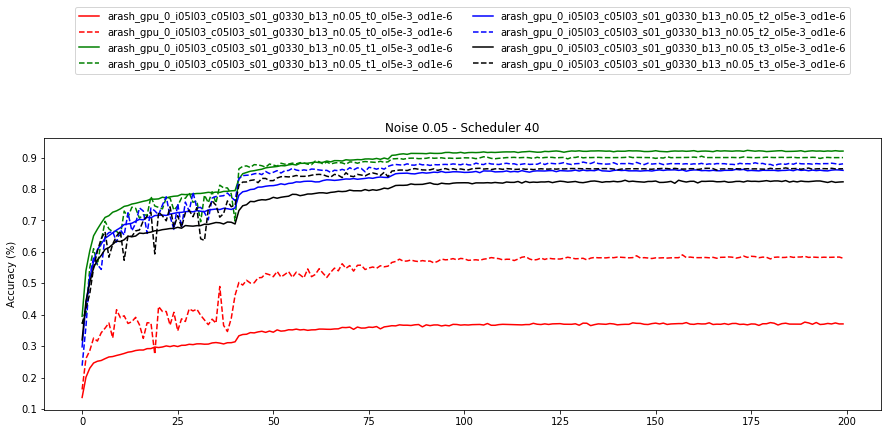

In [79]:
plt.figure(figsize=(15,5))
which_inds = [*range(4)]
colours = ['red', 'green', 'blue', 'black']
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise 0.05 - Scheduler 40')
plt.ylabel('Accuracy (%)')

Text(0,0.5,'Accuracy (%)')

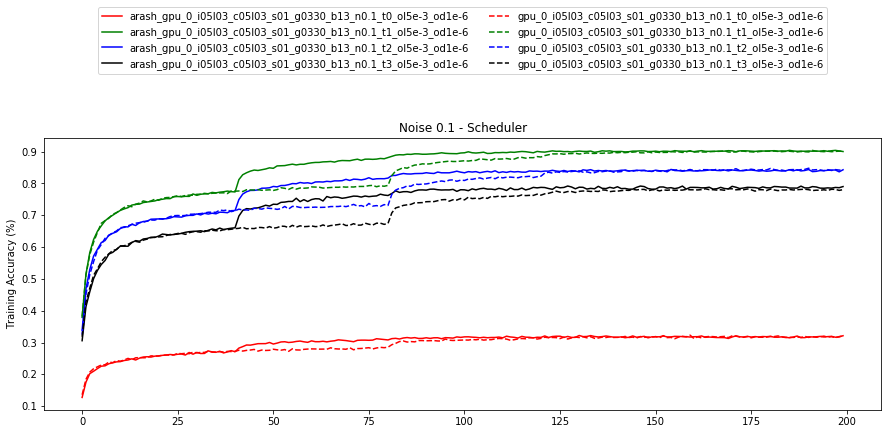

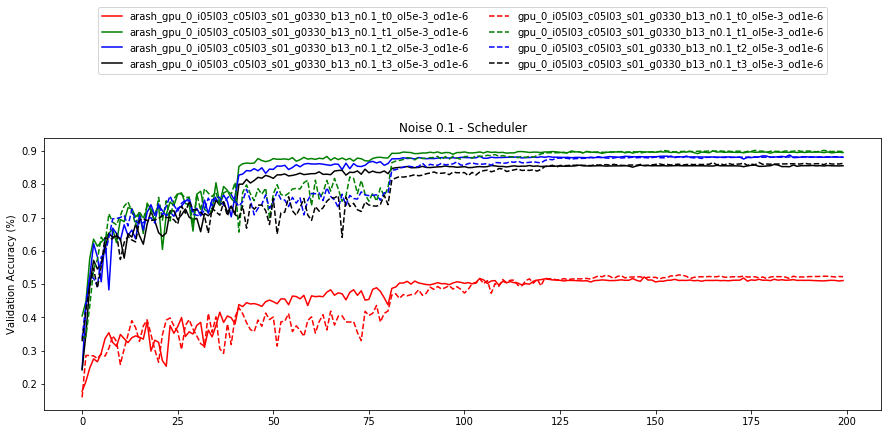

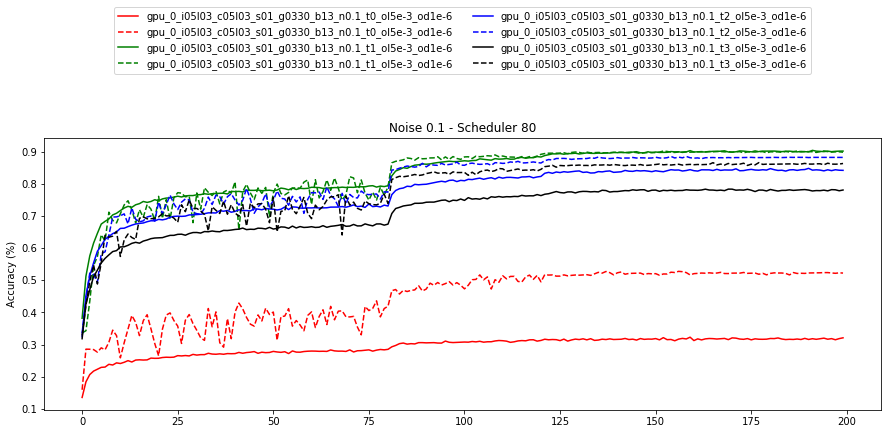

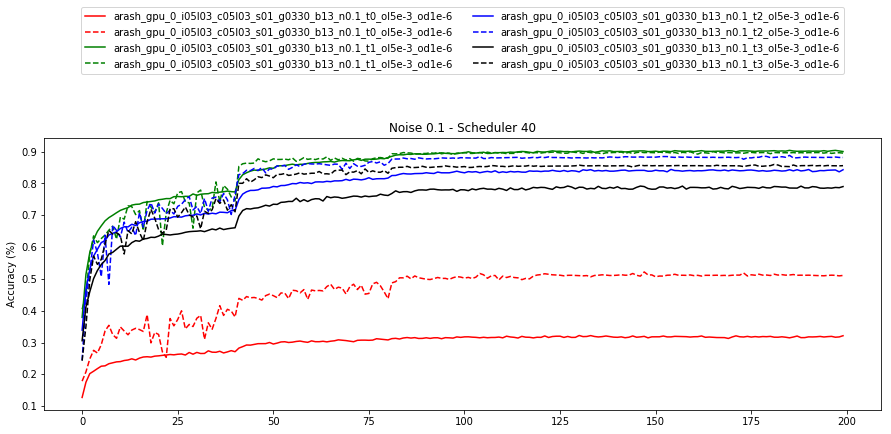

In [81]:
noise_level = '0.1'
plt.figure(figsize=(15,5))
which_inds = [*range(4, 8), *range(28, 32)]
line_styles = ['-'] * 4
line_styles.extend(['--'] * 4)
colours = ['red', 'green', 'blue', 'black'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Training Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [*range(4, 8), *range(28, 32)]
line_styles = ['-'] * 4
line_styles.extend(['--'] * 4)
colours = ['red', 'green', 'blue', 'black'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Validation Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [*range(28, 32)]
colours = ['red', 'green', 'blue', 'black']
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 80' % noise_level)
plt.ylabel('Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [*range(4, 8)]
colours = ['red', 'green', 'blue', 'black']
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 40' % noise_level)
plt.ylabel('Accuracy (%)')

Text(0,0.5,'Accuracy (%)')

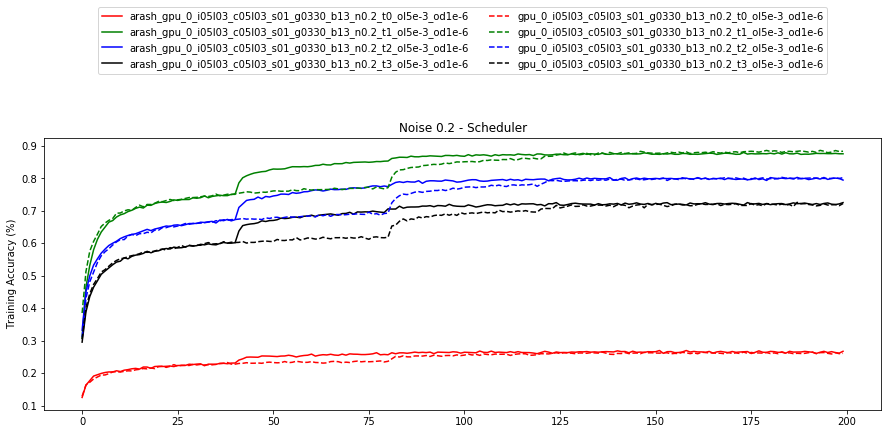

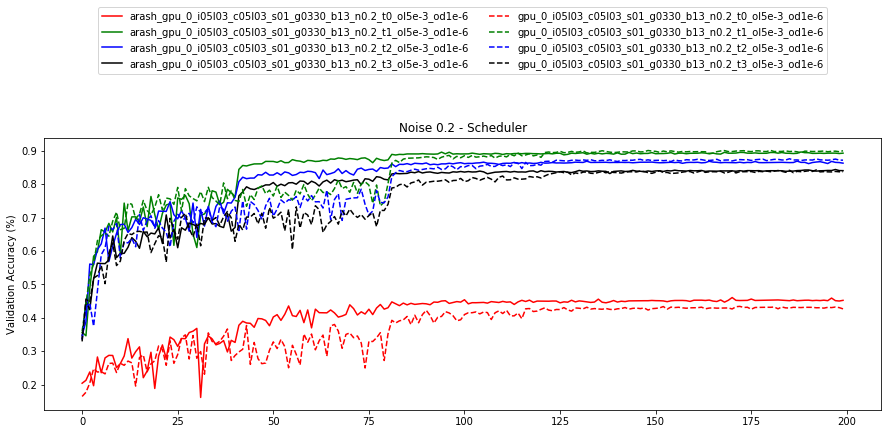

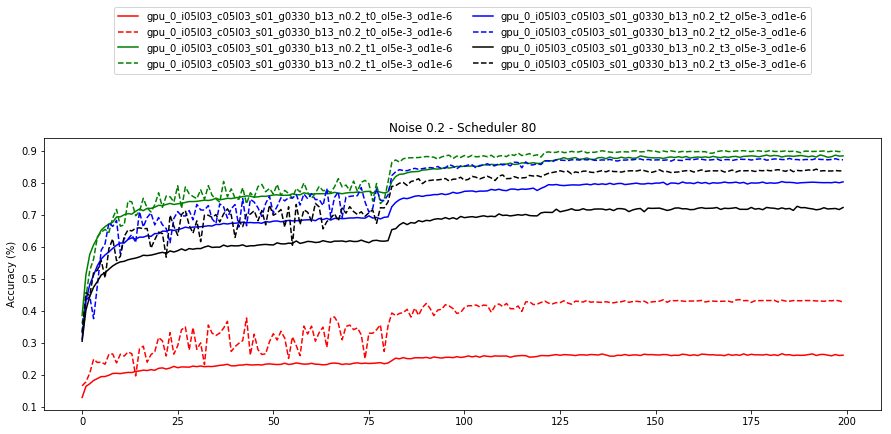

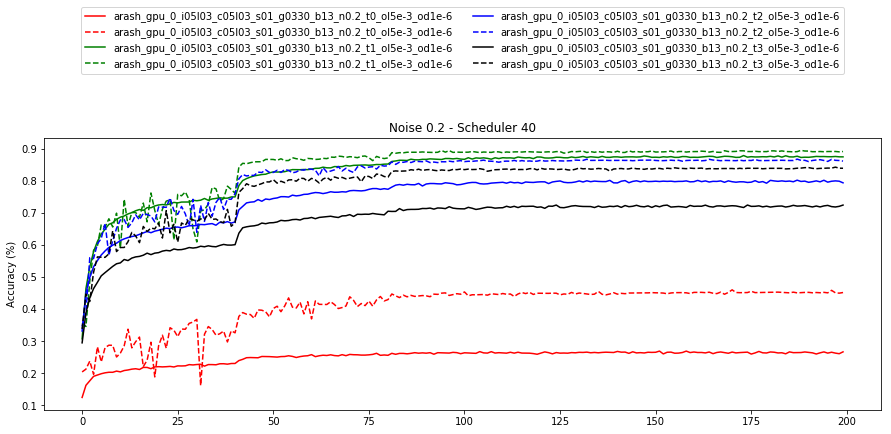

In [82]:
noise_level = '0.2'
plt.figure(figsize=(15,5))
which_inds = [*range(8, 12), *range(32, 36)]
line_styles = ['-'] * 4
line_styles.extend(['--'] * 4)
colours = ['red', 'green', 'blue', 'black'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Training Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [*range(8, 12), *range(32, 36)]
line_styles = ['-'] * 4
line_styles.extend(['--'] * 4)
colours = ['red', 'green', 'blue', 'black'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Validation Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [*range(32, 36)]
colours = ['red', 'green', 'blue', 'black']
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 80' % noise_level)
plt.ylabel('Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [*range(8, 12)]
colours = ['red', 'green', 'blue', 'black']
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 40' % noise_level)
plt.ylabel('Accuracy (%)')

Text(0,0.5,'Validation Accuracy (%)')

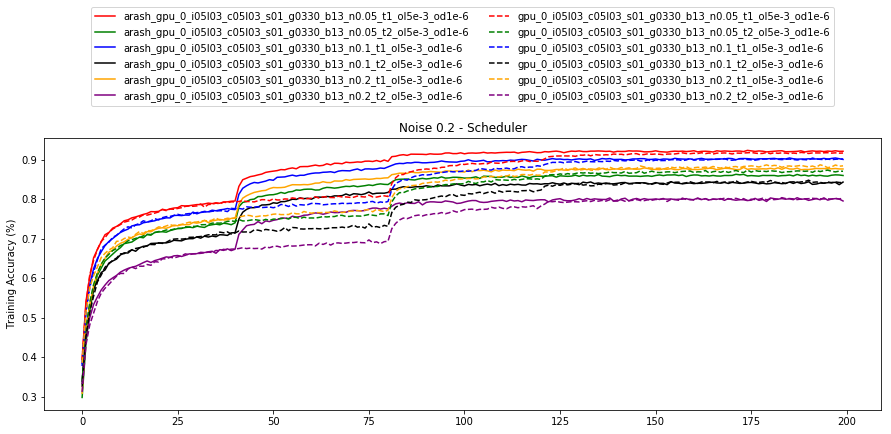

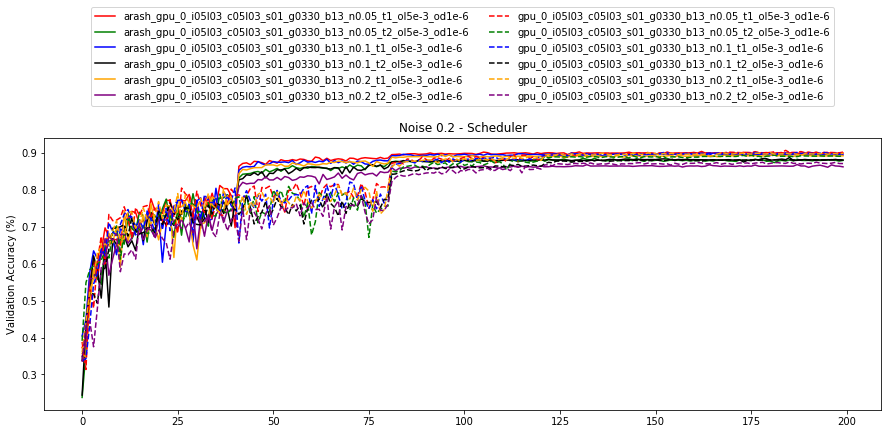

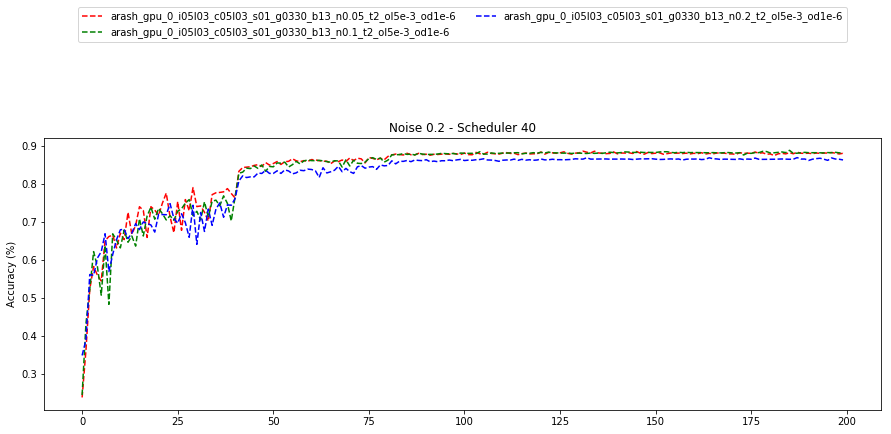

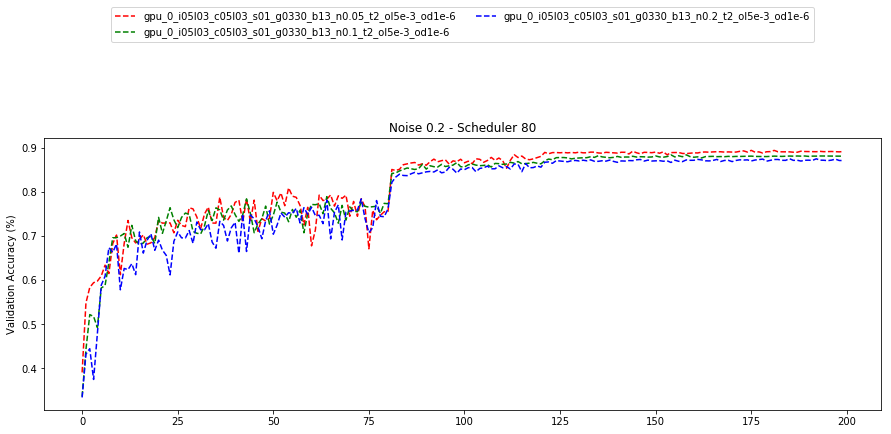

In [94]:
noise_level = '0.2'
plt.figure(figsize=(15,5))
which_inds = [1,2, 5,6, 9,10, 25,26, 29,30, 33,34]
line_styles = ['-'] * 6
line_styles.extend(['--'] * 6)
colours = ['red', 'green', 'blue', 'black', 'orange', 'purple'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Training Accuracy (%)')

##
plt.figure(figsize=(15,5))
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Validation Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [2,6,10] #9,10
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        #plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 40' % noise_level)
plt.ylabel('Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [26,30,34] #33,34
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        #plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 80' % noise_level)
plt.ylabel('Validation Accuracy (%)')

Text(0,0.5,'Validation Accuracy (%)')

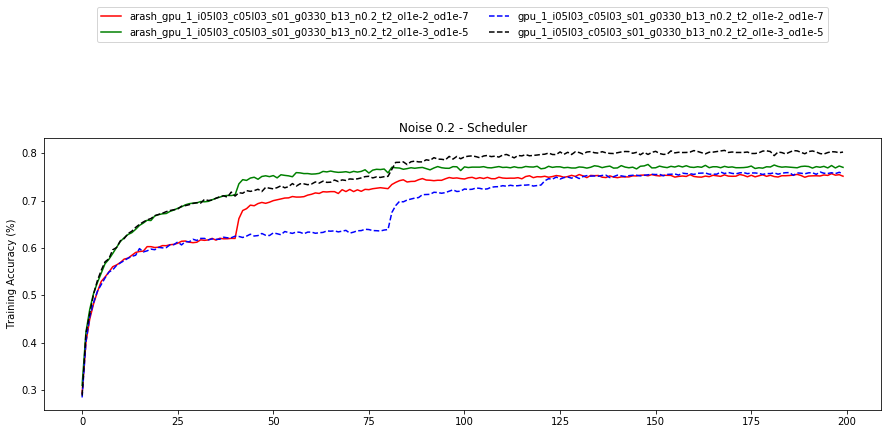

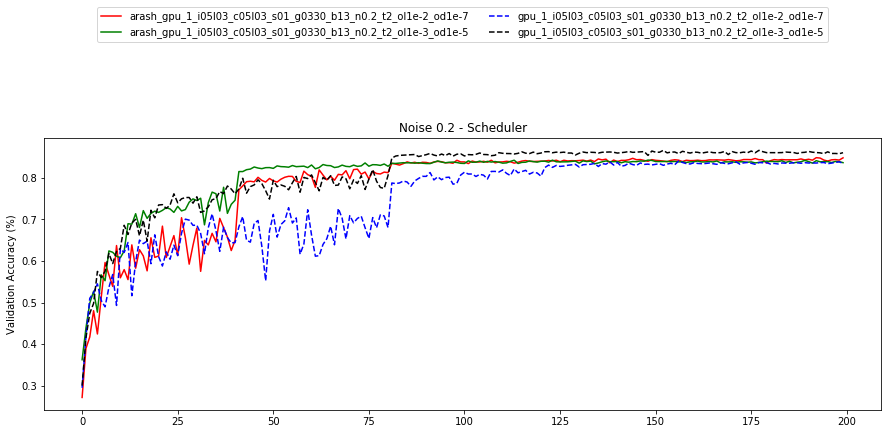

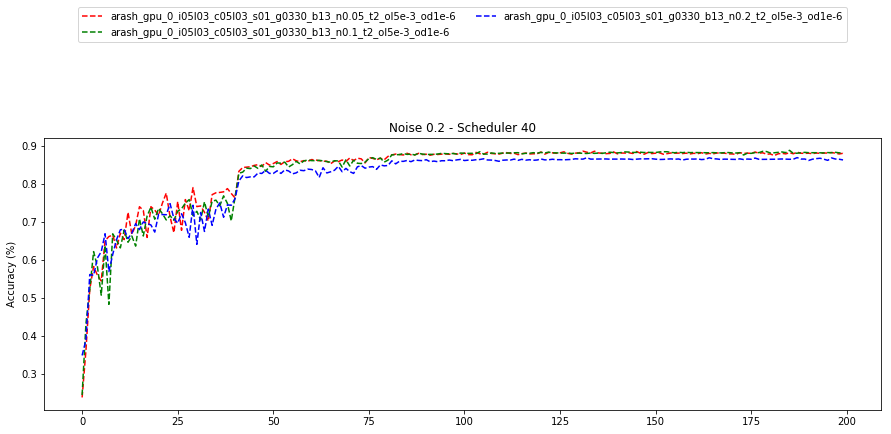

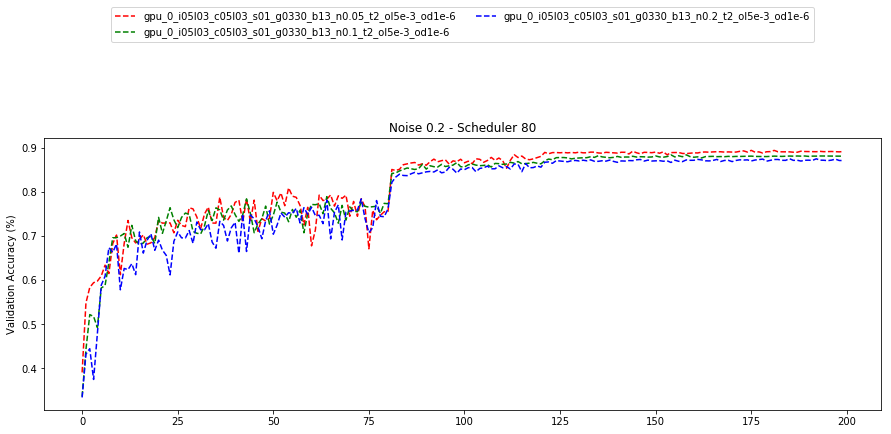

In [98]:
noise_level = '0.2'
plt.figure(figsize=(15,5))
which_inds = [14,15, 38,39]#12,13,14,15,16,17   36,37,38,39,40,41
line_styles = ['-'] * 2
line_styles.extend(['--'] * 2)
colours = ['red', 'green', 'blue', 'black', 'orange', 'purple'] * 2
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Training Accuracy (%)')

##
plt.figure(figsize=(15,5))
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle=line_styles[j], color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler' % noise_level)
plt.ylabel('Validation Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [2,6,10] #9,10
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        #plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 40' % noise_level)
plt.ylabel('Accuracy (%)')

##
plt.figure(figsize=(15,5))
which_inds = [26,30,34] #33,34
j = 0
for i, current_result in enumerate(all_results):
    if i in which_inds:
        #plt.plot(all_results[i].acc, label=all_labels[i], linestyle='-', color=colours[j])
        plt.plot(all_results[i].val_acc, label=all_labels[i], linestyle='--', color=colours[j])
        j += 1
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
plt.title('Noise %s - Scheduler 80' % noise_level)
plt.ylabel('Validation Accuracy (%)')